In [1]:
# The model

In [87]:
install.packages("regclass")

Installing package into ‘/home/valentin/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘grpreg’, ‘bestglm’, ‘VGAM’, ‘randomForest’




In [22]:
library(e1071)   
library(psych)
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(sqldf)
library(semTools)
library(pastecs)
library(sjstats) 
library(userfriendlyscience)
library(foreign)
library(lm.beta)
library(stargazer)
library(broom)
library(Epi)
library(arm)
library(DescTools)
library(car)
library(generalhoslem)
library(regclass)

In [11]:
data <- read.csv("../Data/sperformance-dataset.csv", na.strings=c("na"," ","",".","NA"), header = TRUE)

In [14]:
norm_score_data <- sqldf("select * from data where mg1 > 0 and mg2 > 0 and mg3 > 0 and pg1 > 0 and pg2 > 0 and pg3 > 0")

In [15]:
# Building the first model where we assert that past grades can be used to predict the final grades ()
head(norm_score_data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel.p,freetime.p,goout.p,Dalc.p,Walc.p,health.p,absences.p,pG1,pG2,pG3
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,15,R,GT3,T,1,1,at_home,other,⋯,3,1,2,1,1,1,4,13,13,13
2,GP,F,15,R,GT3,T,1,1,other,other,⋯,3,3,4,2,4,5,2,13,11,11
3,GP,F,15,R,GT3,T,2,2,at_home,other,⋯,4,3,1,1,1,2,8,14,13,12
4,GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,11,10
5,GP,F,15,R,GT3,T,3,3,services,services,⋯,4,2,1,2,3,3,2,13,13,13
6,GP,F,15,R,GT3,T,3,4,services,health,⋯,4,3,2,1,1,5,2,11,12,12


In [18]:
# simple linear regression model
model1<-lm(norm_score_data$mG3~norm_score_data$mG1)
anova(model1)
summary(model1)
lm.beta::lm.beta(model1)
stargazer(model1, type="text") 
# result is 1.425 + 0.901

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
norm_score_data$mG1,1,2877.3953,2877.395262,1364.757,1.530378e-120
Residuals,337,710.5162,2.108357,NA,NA



Call:
lm(formula = norm_score_data$mG3 ~ norm_score_data$mG1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6590 -1.0644 -0.1635  1.1338  3.6383 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.45179    0.28630   5.071 6.55e-07 ***
norm_score_data$mG1  0.90090    0.02439  36.943  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.452 on 337 degrees of freedom
Multiple R-squared:  0.802,	Adjusted R-squared:  0.8014 
F-statistic:  1365 on 1 and 337 DF,  p-value: < 2.2e-16



Call:
lm(formula = norm_score_data$mG3 ~ norm_score_data$mG1)

Standardized Coefficients::
        (Intercept) norm_score_data$mG1 
          0.0000000           0.8955274 



                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
mG1                          0.901***          
                              (0.024)          
                                               
Constant                     1.452***          
                              (0.286)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.802           
Adjusted R2                    0.801           
Residual Std. Error      1.452 (df = 337)      
F Statistic         1,364.757*** (df = 1; 337) 
Note:               *p<0.1; **p<0.05; ***p<0.01


In [19]:
# Multiple linear regression
model2<-lm(norm_score_data$mG3~norm_score_data$mG2+norm_score_data$mG1)
anova(model2)
summary(model2)
stargazer(model2, type="text") #Tidy output of all the required stats
lm.beta(model2)
stargazer(model1, model2, type="text") #Quick model comparison

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
norm_score_data$mG2,1,3350.373276,3350.3732764,4891.23946,2.558715e-202
norm_score_data$mG1,1,7.386867,7.3868667,10.78415,1.131511e-03
Residuals,336,230.151361,0.6849743,NA,NA



Call:
lm(formula = norm_score_data$mG3 ~ norm_score_data$mG2 + norm_score_data$mG1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2152 -0.3133 -0.1741  0.6884  2.7917 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.23575    0.16953   1.391  0.16526    
norm_score_data$mG2  0.88821    0.03354  26.482  < 2e-16 ***
norm_score_data$mG1  0.10836    0.03300   3.284  0.00113 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8276 on 336 degrees of freedom
Multiple R-squared:  0.9359,	Adjusted R-squared:  0.9355 
F-statistic:  2451 on 2 and 336 DF,  p-value: < 2.2e-16



                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
mG2                          0.888***          
                              (0.034)          
                                               
mG1                          0.108***          
                              (0.033)          
                                               
Constant                       0.236           
                              (0.170)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.936           
Adjusted R2                    0.935           
Residual Std. Error      0.828 (df = 336)      
F Statistic         2,451.012*** (df = 2; 336) 
Note:               *p<0.1; **p<0.05; ***p<0.01



Call:
lm(formula = norm_score_data$mG3 ~ norm_score_data$mG2 + norm_score_data$mG1)

Standardized Coefficients::
        (Intercept) norm_score_data$mG2 norm_score_data$mG1 
          0.0000000           0.8686369           0.1077166 



                                     Dependent variable:                 
                    -----------------------------------------------------
                                             mG3                         
                               (1)                        (2)            
-------------------------------------------------------------------------
mG2                                                     0.888***         
                                                        (0.034)          
                                                                         
mG1                          0.901***                   0.108***         
                             (0.024)                    (0.033)          
                                                                         
Constant                     1.452***                    0.236           
                             (0.286)                    (0.170)          
                                     

In [23]:
model_metrics <- augment(model2)

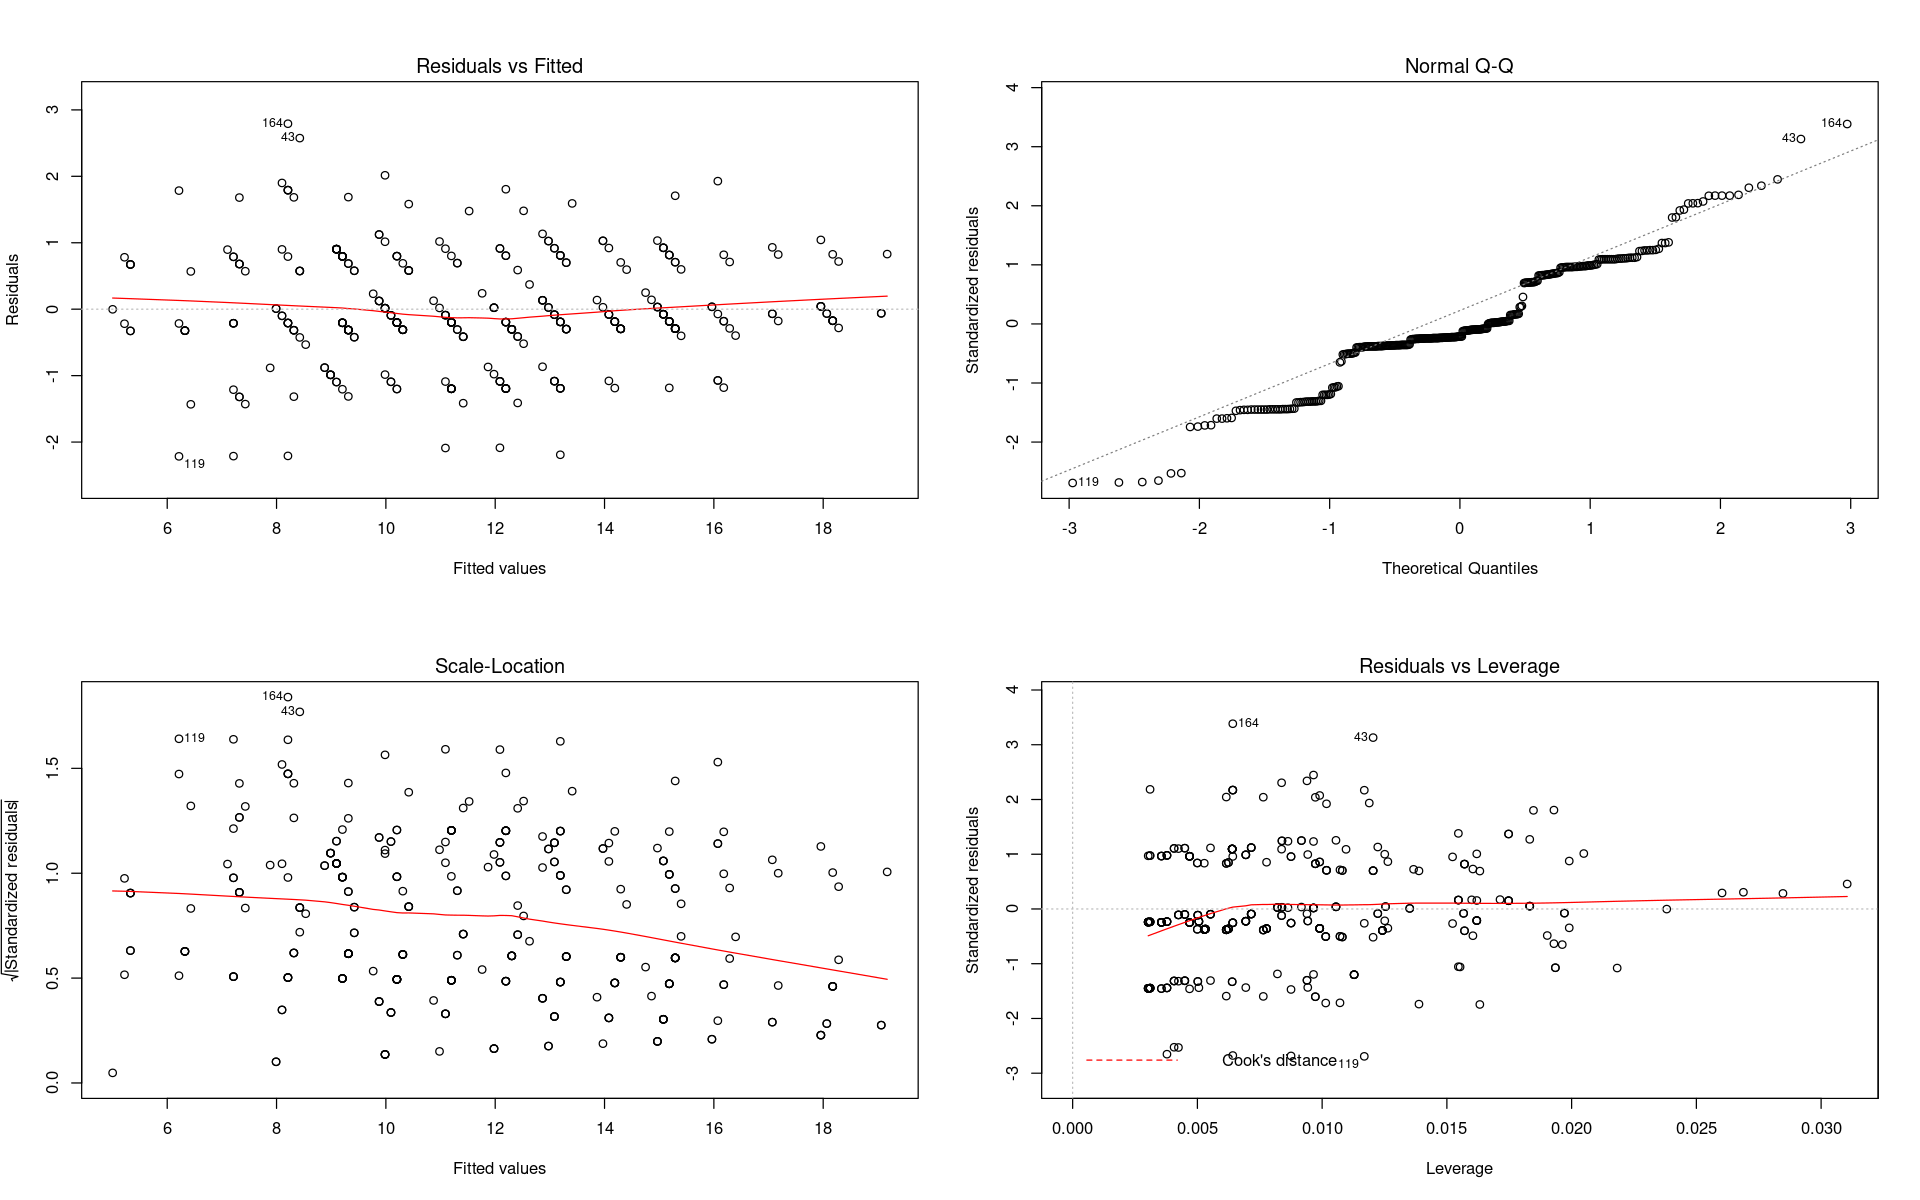

In [30]:
# homocedasticity graph
options(repr.plot.width = 16, repr.plot.height = 10)
par(mfrow = c(2, 2))
plot(model2)

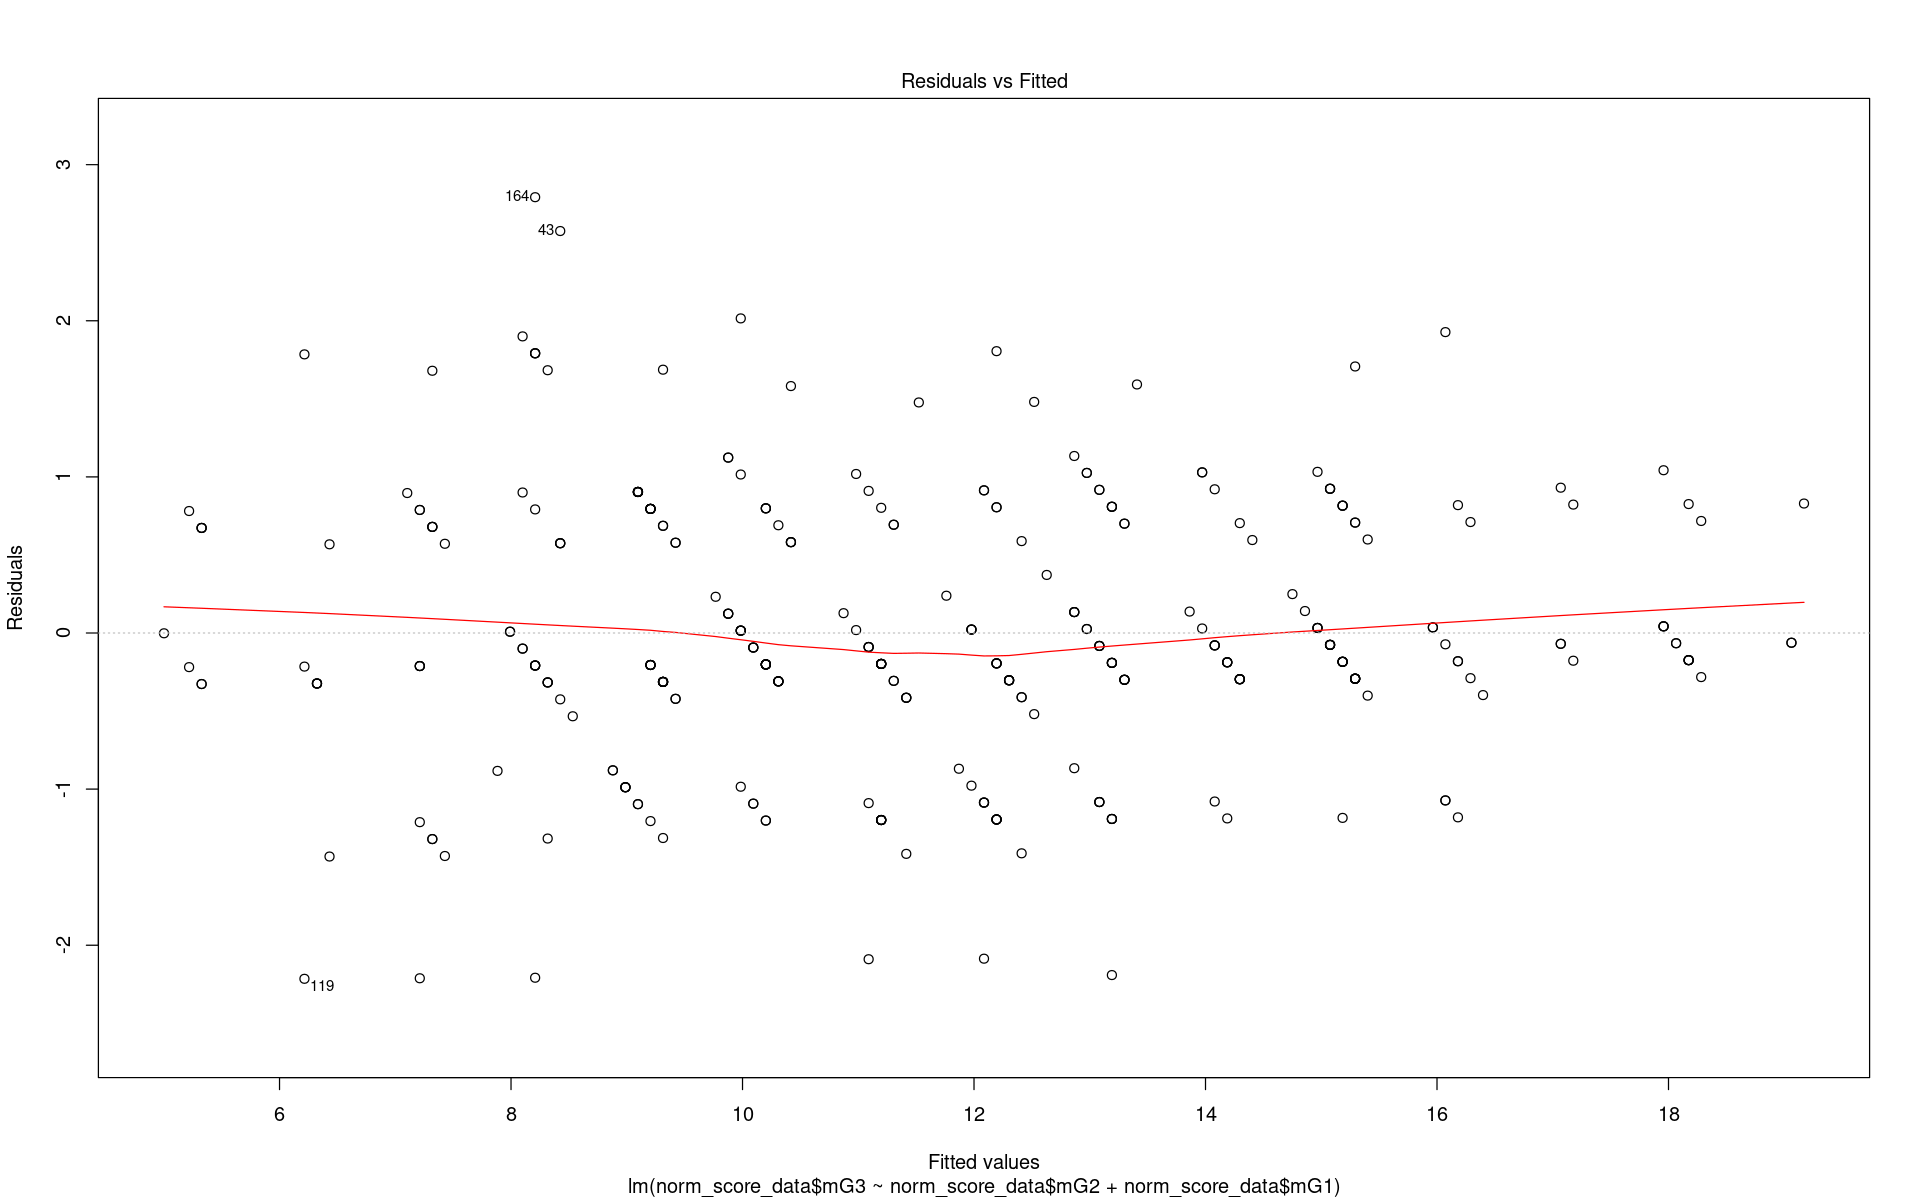

In [31]:
plot(model2, 1)

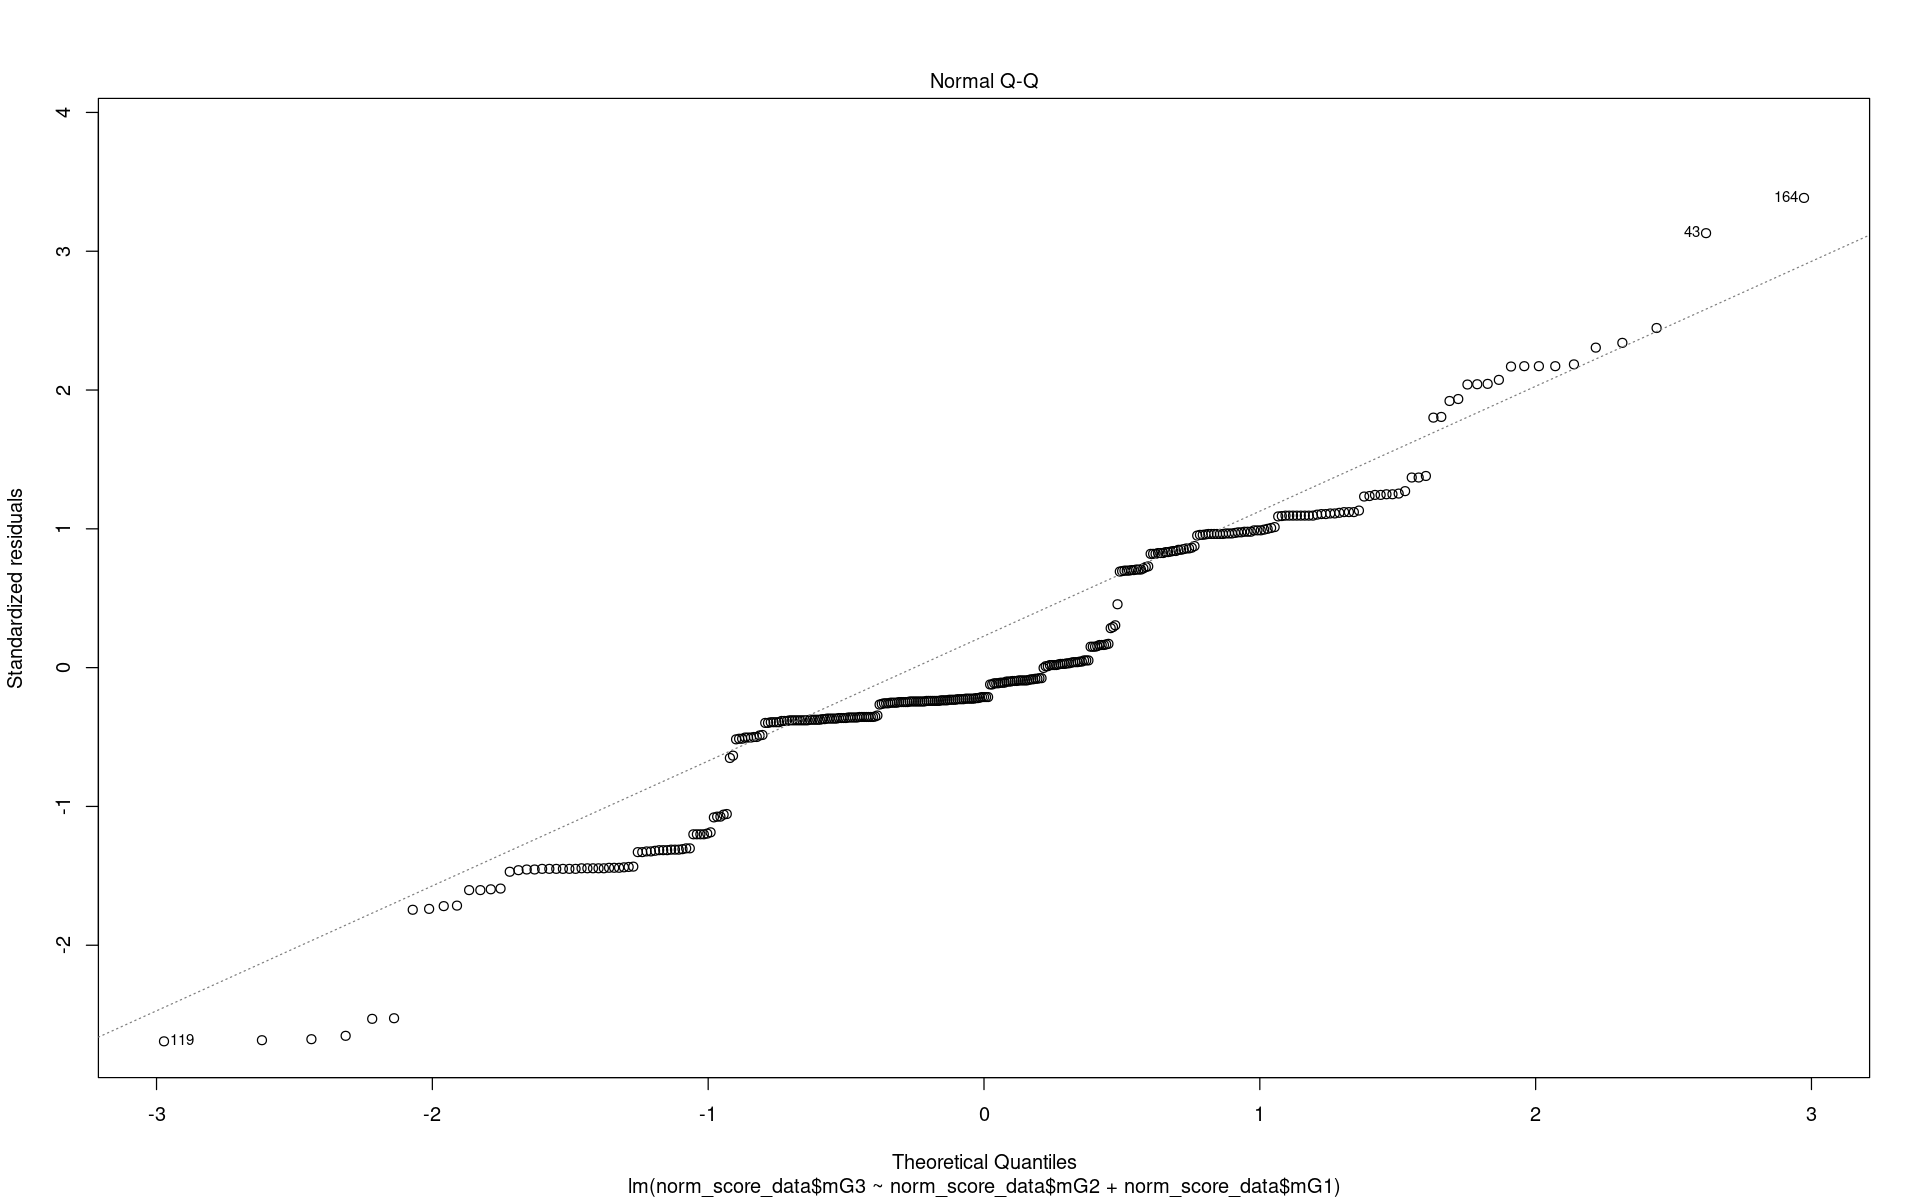

In [32]:
plot(model2, 2)

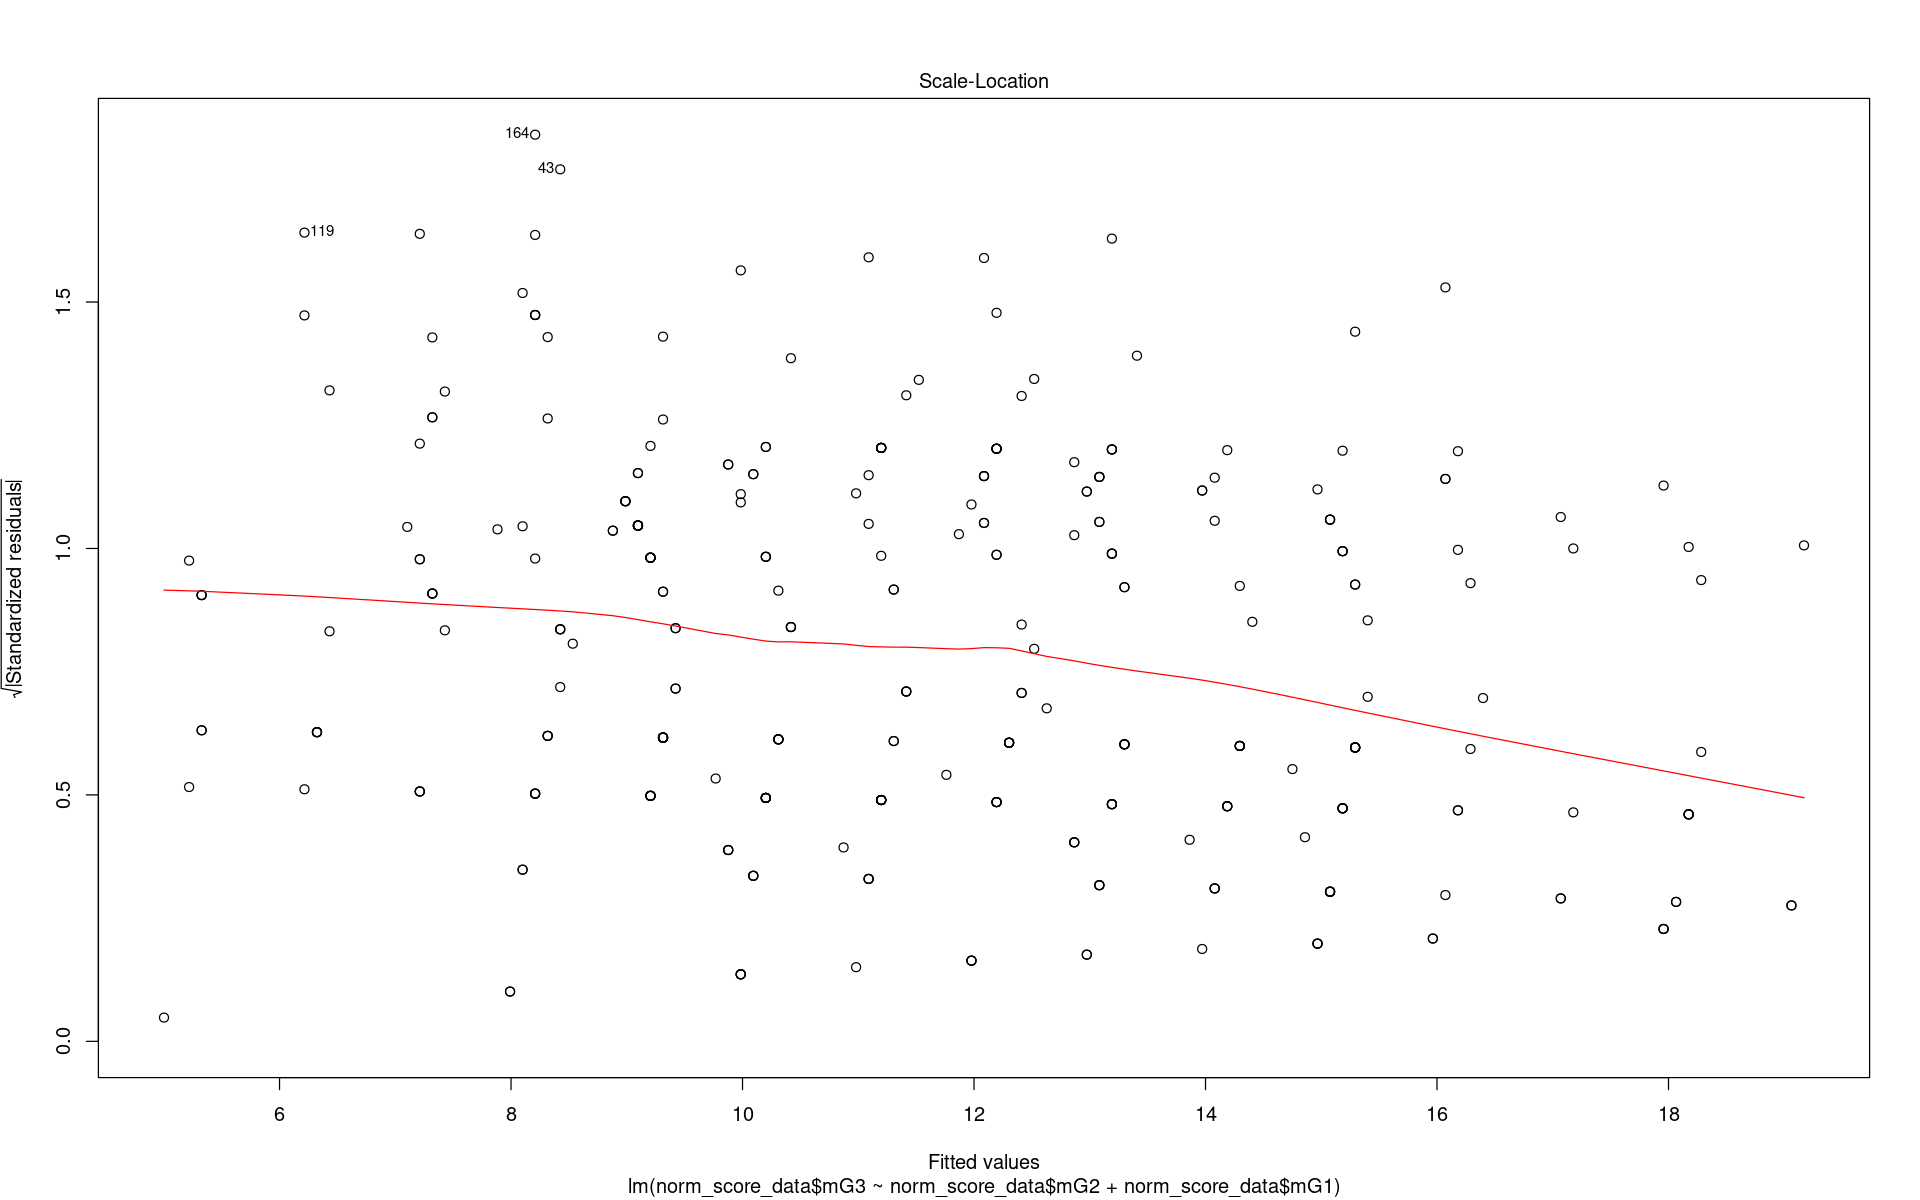

In [33]:
plot(model2, 3)

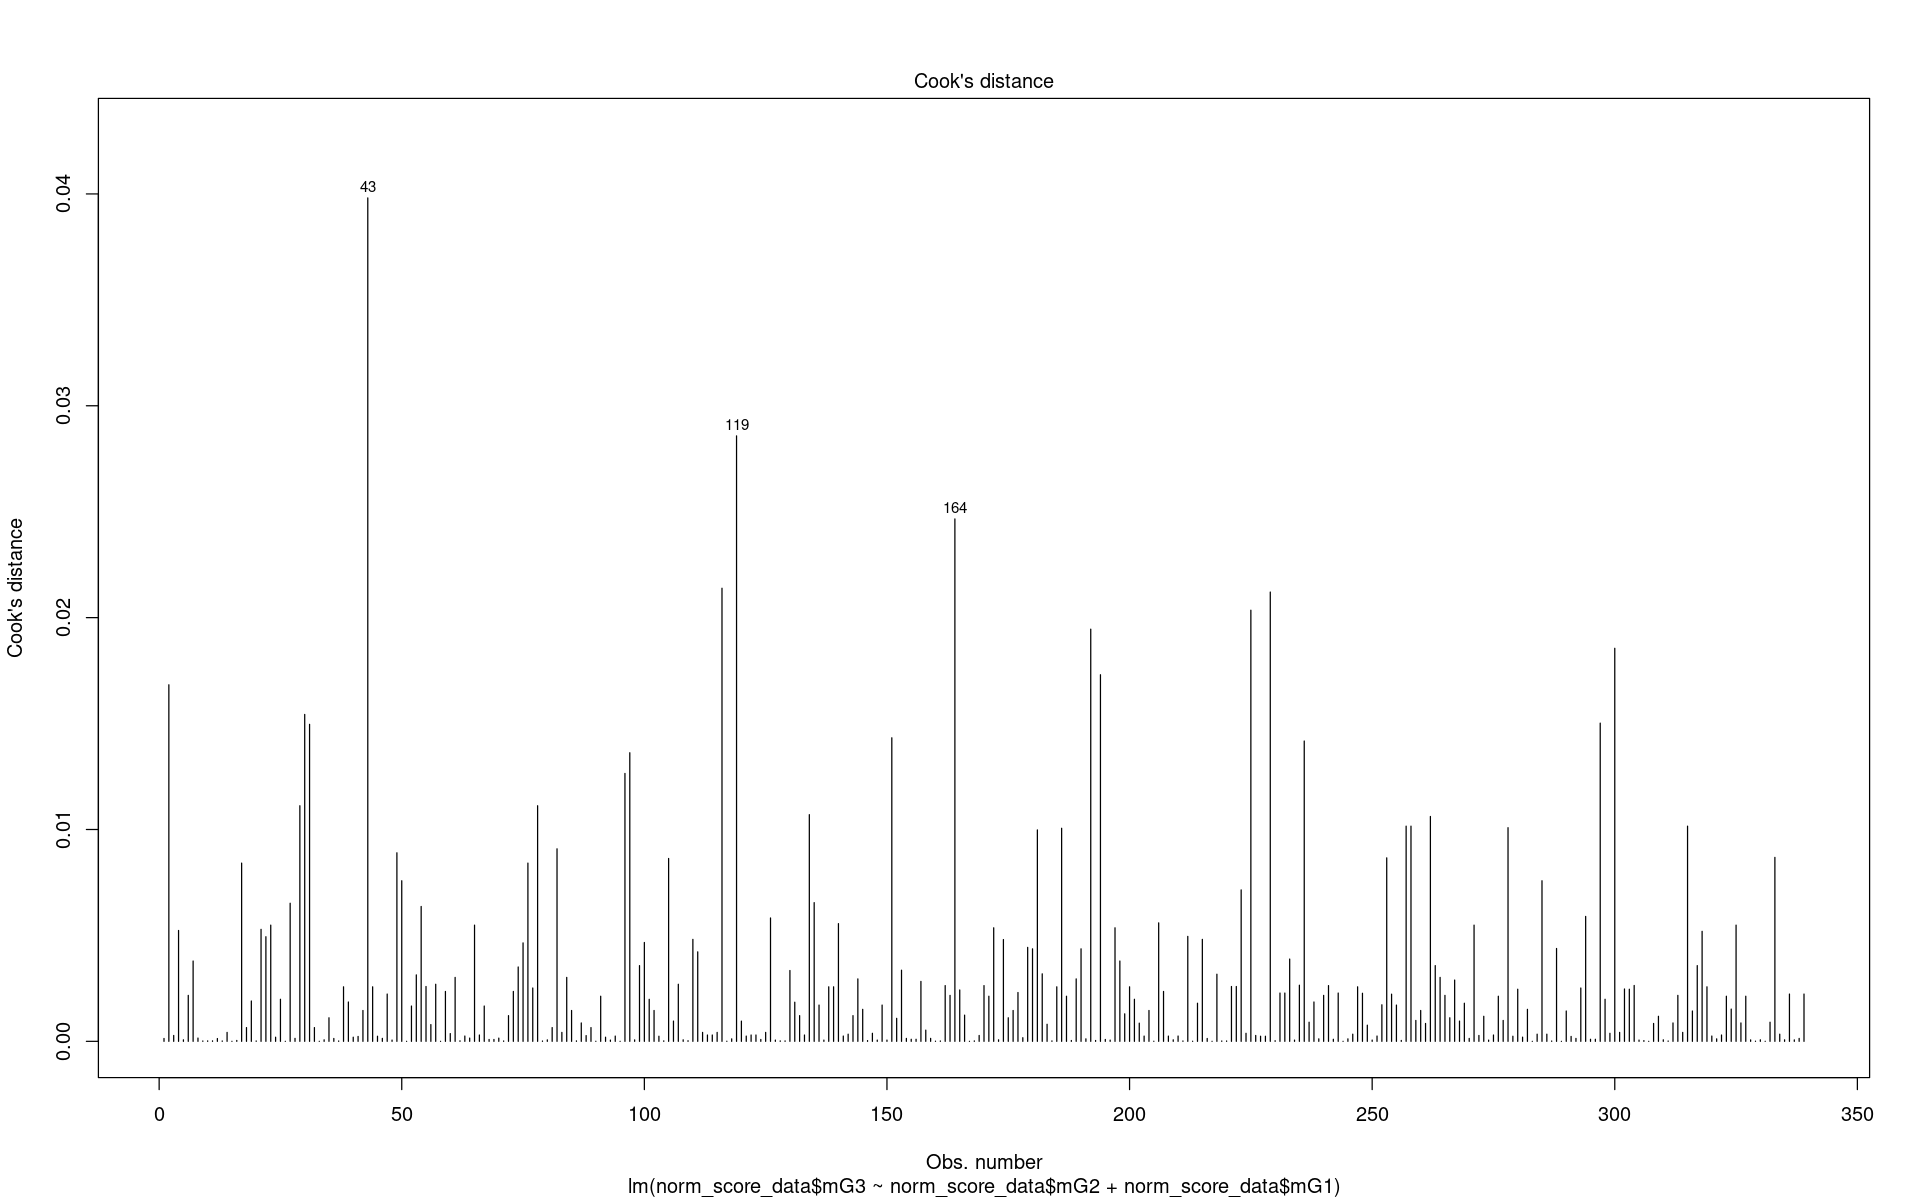

In [34]:
plot(model2, 4)

In [36]:
colnames(norm_score_data)

[1] "school"       "sex"          "age"          "address"      "famsize"     
 [6] "Pstatus"      "Medu"         "Fedu"         "Mjob"         "Fjob"        
[11] "reason"       "nursery"      "internet"     "guardian.m"   "traveltime.m"
[16] "studytime.m"  "failures.m"   "schoolsup.m"  "famsup.m"     "paid.m"      
[21] "activities.m" "higher.m"     "romantic.m"   "famrel.m"     "freetime.m"  
[26] "goout.m"      "Dalc.m"       "Walc.m"       "health.m"     "absences.m"  
[31] "mG1"          "mG2"          "mG3"          "guardian.p"   "traveltime.p"
[36] "studytime.p"  "failures.p"   "schoolsup.p"  "famsup.p"     "paid.p"      
[41] "activities.p" "higher.p"     "romantic.p"   "famrel.p"     "freetime.p"  
[46] "goout.p"      "Dalc.p"       "Walc.p"       "health.p"     "absences.p"  
[51] "pG1"          "pG2"          "pG3"

In [65]:
norm_score_data_dummy <- norm_score_data

In [150]:
# building second model, using dummy variables
# Multiple linear regression0
# long travel time (31 mins above), short travel time(30 mins below)
#numeric: 1 – < 15 min., 2 – 15 to 30 min., 3 – 30 min. to 1 hour or 4 – > 1 hour
norm_score_data_dummy$traveltimeLong = ifelse(norm_score_data_dummy$traveltime.m >=3,1,0)
norm_score_data_dummy$traveltimeShort = ifelse(norm_score_data_dummy$traveltime.m <=2,1,0)

In [151]:
model3<-lm(formula = mG3 ~ traveltimeLong + traveltimeShort ,data = norm_score_data_dummy)
stargazer(model3, type="text") #Quick model comparison
summary(model3)


                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
traveltimeLong                -1.000           
                              (1.475)          
                                               
traveltimeShort                0.687           
                              (0.834)          
                                               
Constant                     11.000***         
                              (0.814)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.007           
Adjusted R2                    0.001           
Residual Std. Error      3.256 (df = 336)      
F Statistic             1.223 (df = 2; 336)    
Note:               *p<0.1; **p<0.05; ***p<0.01



Call:
lm(formula = mG3 ~ traveltimeLong + traveltimeShort, data = norm_score_data_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6867 -1.6867 -0.6867  2.3133  8.3133 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      11.0000     0.8140  13.514   <2e-16 ***
traveltimeLong   -1.0000     1.4755  -0.678    0.498    
traveltimeShort   0.6867     0.8343   0.823    0.411    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.256 on 336 degrees of freedom
Multiple R-squared:  0.007226,	Adjusted R-squared:  0.001317 
F-statistic: 1.223 on 2 and 336 DF,  p-value: 0.2957


In [142]:
norm_score_data_dummy$studytimeLong = ifelse(norm_score_data_dummy$studytime.m >=3,1,0)
norm_score_data_dummy$studytimeShort = ifelse(norm_score_data_dummy$studytime.m <=2,1,0)

In [143]:
# checking significance of studytime
model4<-lm(norm_score_data_dummy$mG3~norm_score_data_dummy$studytimeLong+norm_score_data_dummy$studytimeShort)
stargazer(model4, type="text") #Quick model comparison
summary(model4)


                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
studytimeLong                1.300***          
                              (0.411)          
                                               
studytimeShort                                 
                                               
                                               
Constant                     11.313***         
                              (0.200)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.029           
Adjusted R2                    0.026           
Residual Std. Error      3.216 (df = 337)      
F Statistic           9.986*** (df = 1; 337)   
Note:               *p<0.1; **p<0.05; ***p<0.01



Call:
lm(formula = norm_score_data_dummy$mG3 ~ norm_score_data_dummy$studytimeLong + 
    norm_score_data_dummy$studytimeShort)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3127 -2.3127 -0.3127  2.3875  7.6873 

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           11.3127     0.1998   56.62  < 2e-16 ***
norm_score_data_dummy$studytimeLong    1.2998     0.4113    3.16  0.00172 ** 
norm_score_data_dummy$studytimeShort       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.216 on 337 degrees of freedom
Multiple R-squared:  0.02878,	Adjusted R-squared:  0.0259 
F-statistic: 9.986 on 1 and 337 DF,  p-value: 0.00172


In [70]:
#dummy data for male and Female
# norm_score_data_dummy$sex = ifelse(norm_score_data_dummy$sex == "M",0,ifelse(norm_score_data_dummy$sex == "F",1,NA))
norm_score_data_dummy$genderMale = ifelse(norm_score_data_dummy$sex == "M",1,0)
norm_score_data_dummy$genderFemale = ifelse(norm_score_data_dummy$sex == "F",1,0)

In [71]:
# checking significance of studytime
modelSex<-lm(norm_score_data_dummy$mG3~norm_score_data_dummy$genderMale+norm_score_data_dummy$genderFemale)
stargazer(modelSex, type="text") #Quick model comparison
summary(modelSex)


                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
genderMale                   0.935***          
                              (0.351)          
                                               
genderFemale                                   
                                               
                                               
Constant                     11.162***         
                              (0.246)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.021           
Adjusted R2                    0.018           
Residual Std. Error      3.229 (df = 337)      
F Statistic           7.096*** (df = 1; 337)   
Note:               *p<0.1; **p<0.05; ***p<0.01



Call:
lm(formula = norm_score_data_dummy$mG3 ~ norm_score_data_dummy$genderMale + 
    norm_score_data_dummy$genderFemale)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1618 -2.1291 -0.1618  2.8382  7.9036 

Coefficients: (1 not defined because of singularities)
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         11.1618     0.2455  45.465   <2e-16 ***
norm_score_data_dummy$genderMale     0.9345     0.3508   2.664   0.0081 ** 
norm_score_data_dummy$genderFemale       NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.229 on 337 degrees of freedom
Multiple R-squared:  0.02062,	Adjusted R-squared:  0.01771 
F-statistic: 7.096 on 1 and 337 DF,  p-value: 0.008099


In [72]:
# testing model
# checking significance of sex
model5<-lm(norm_score_data_dummy$mG3~norm_score_data_dummy$sex)
stargazer(model5, type="text") #Quick model comparison
summary(model5)


                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
sexM                         0.935***          
                              (0.351)          
                                               
Constant                     11.162***         
                              (0.246)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.021           
Adjusted R2                    0.018           
Residual Std. Error      3.229 (df = 337)      
F Statistic           7.096*** (df = 1; 337)   
Note:               *p<0.1; **p<0.05; ***p<0.01



Call:
lm(formula = norm_score_data_dummy$mG3 ~ norm_score_data_dummy$sex)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1618 -2.1291 -0.1618  2.8382  7.9036 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 11.1618     0.2455  45.465   <2e-16 ***
norm_score_data_dummy$sexM   0.9345     0.3508   2.664   0.0081 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.229 on 337 degrees of freedom
Multiple R-squared:  0.02062,	Adjusted R-squared:  0.01771 
F-statistic: 7.096 on 1 and 337 DF,  p-value: 0.008099


In [73]:
final_model = lm(formula=mG3 ~ genderMale + studytimeLong + traveltimeLong , data = norm_score_data_dummy)
stargazer(final_model, type="text") #Quick model comparison
summary(final_model)


                        Dependent variable:    
                    ---------------------------
                                mG3            
-----------------------------------------------
genderMale                   1.247***          
                              (0.352)          
                                               
studytimeLong                1.571***          
                              (0.414)          
                                               
traveltimeLong                -0.972           
                              (0.685)          
                                               
Constant                     10.704***         
                              (0.278)          
                                               
-----------------------------------------------
Observations                    339            
R2                             0.068           
Adjusted R2                    0.060           
Residual Std. Error      3.159 (df = 33


Call:
lm(formula = mG3 ~ genderMale + studytimeLong + traveltimeLong, 
    data = norm_score_data_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9513 -2.1268  0.0487  2.2960  7.2960 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10.7040     0.2783  38.462  < 2e-16 ***
genderMale       1.2473     0.3516   3.547 0.000444 ***
studytimeLong    1.5708     0.4140   3.794 0.000176 ***
traveltimeLong  -0.9724     0.6848  -1.420 0.156499    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.159 on 335 degrees of freedom
Multiple R-squared:  0.06806,	Adjusted R-squared:  0.05972 
F-statistic: 8.155 on 3 and 335 DF,  p-value: 2.958e-05


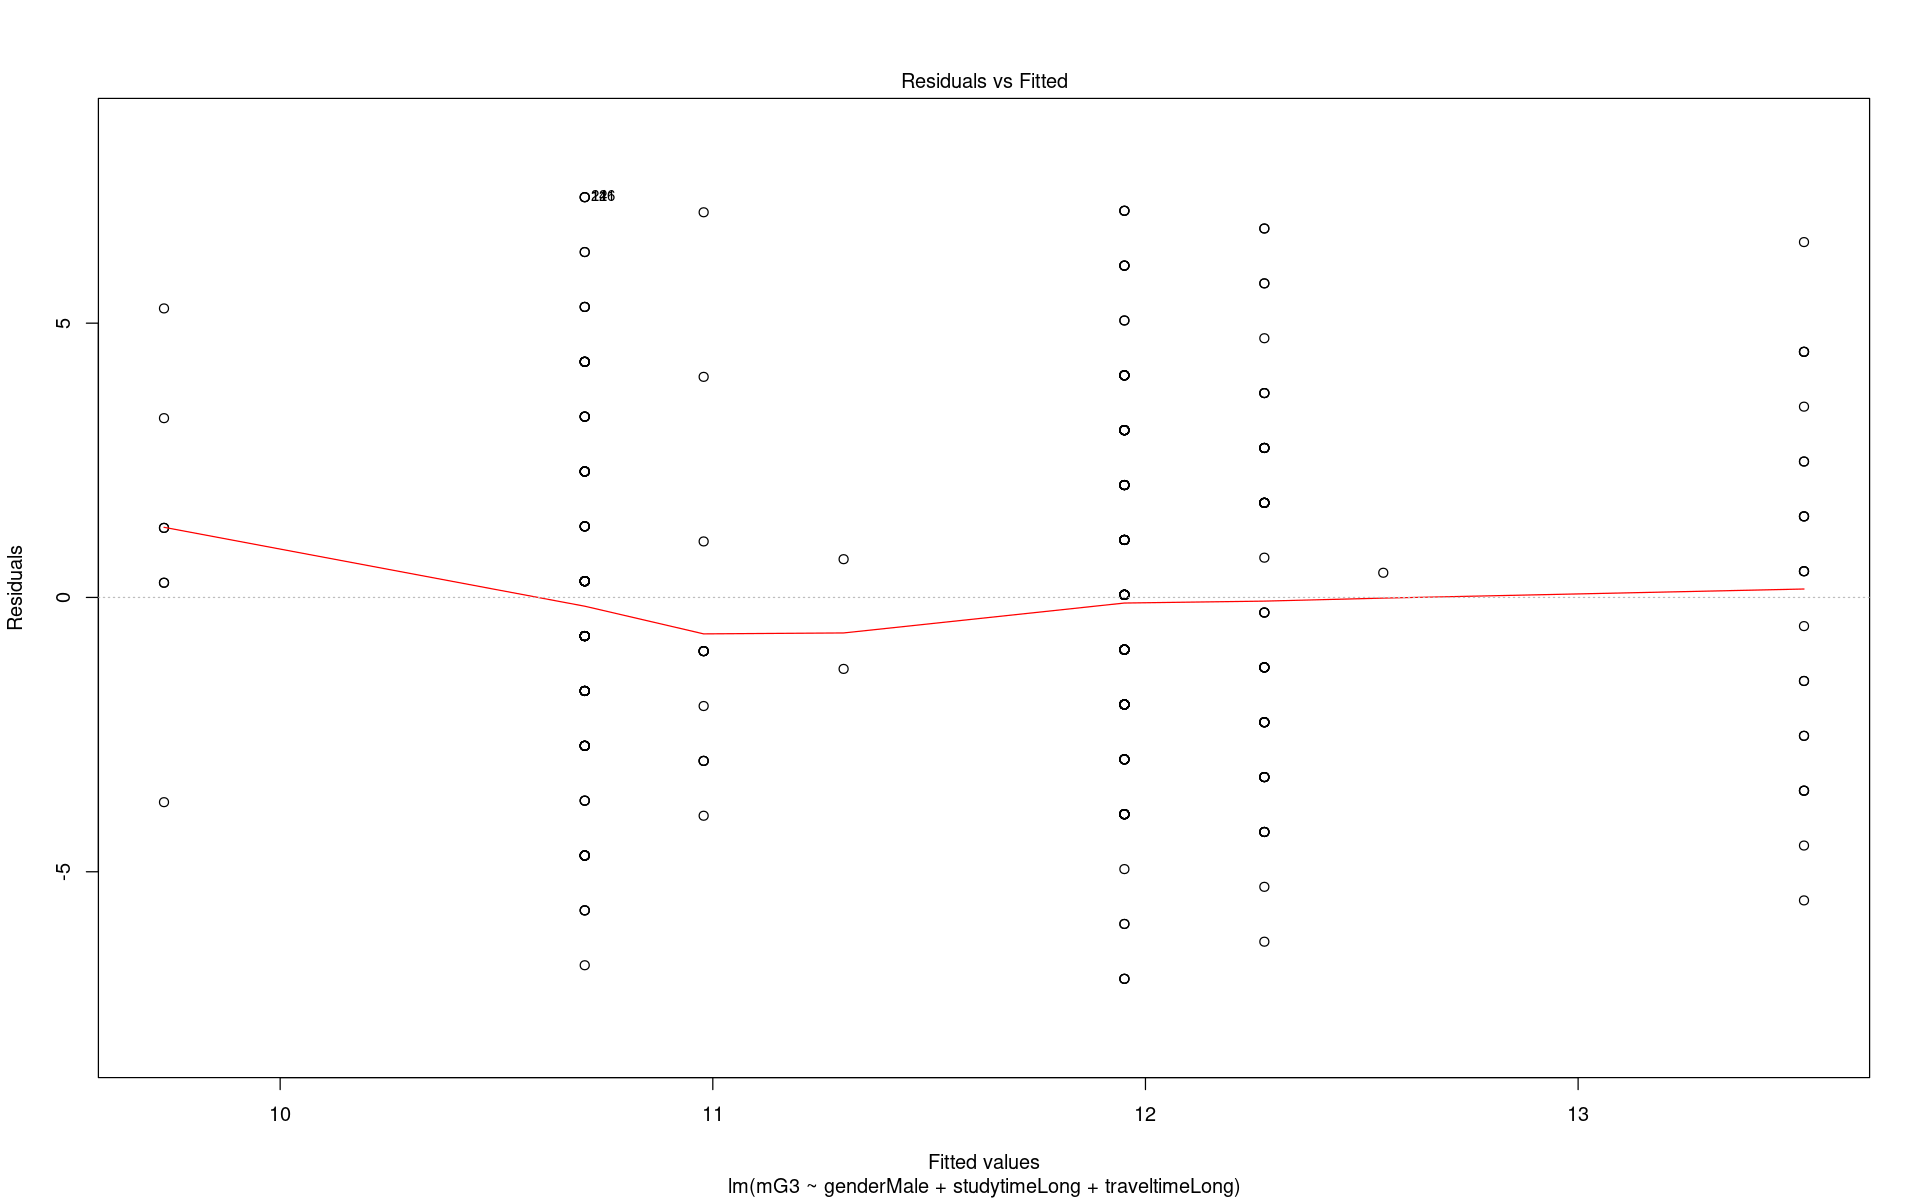

In [74]:
# Showing assumption scores
plot(final_model, 1)

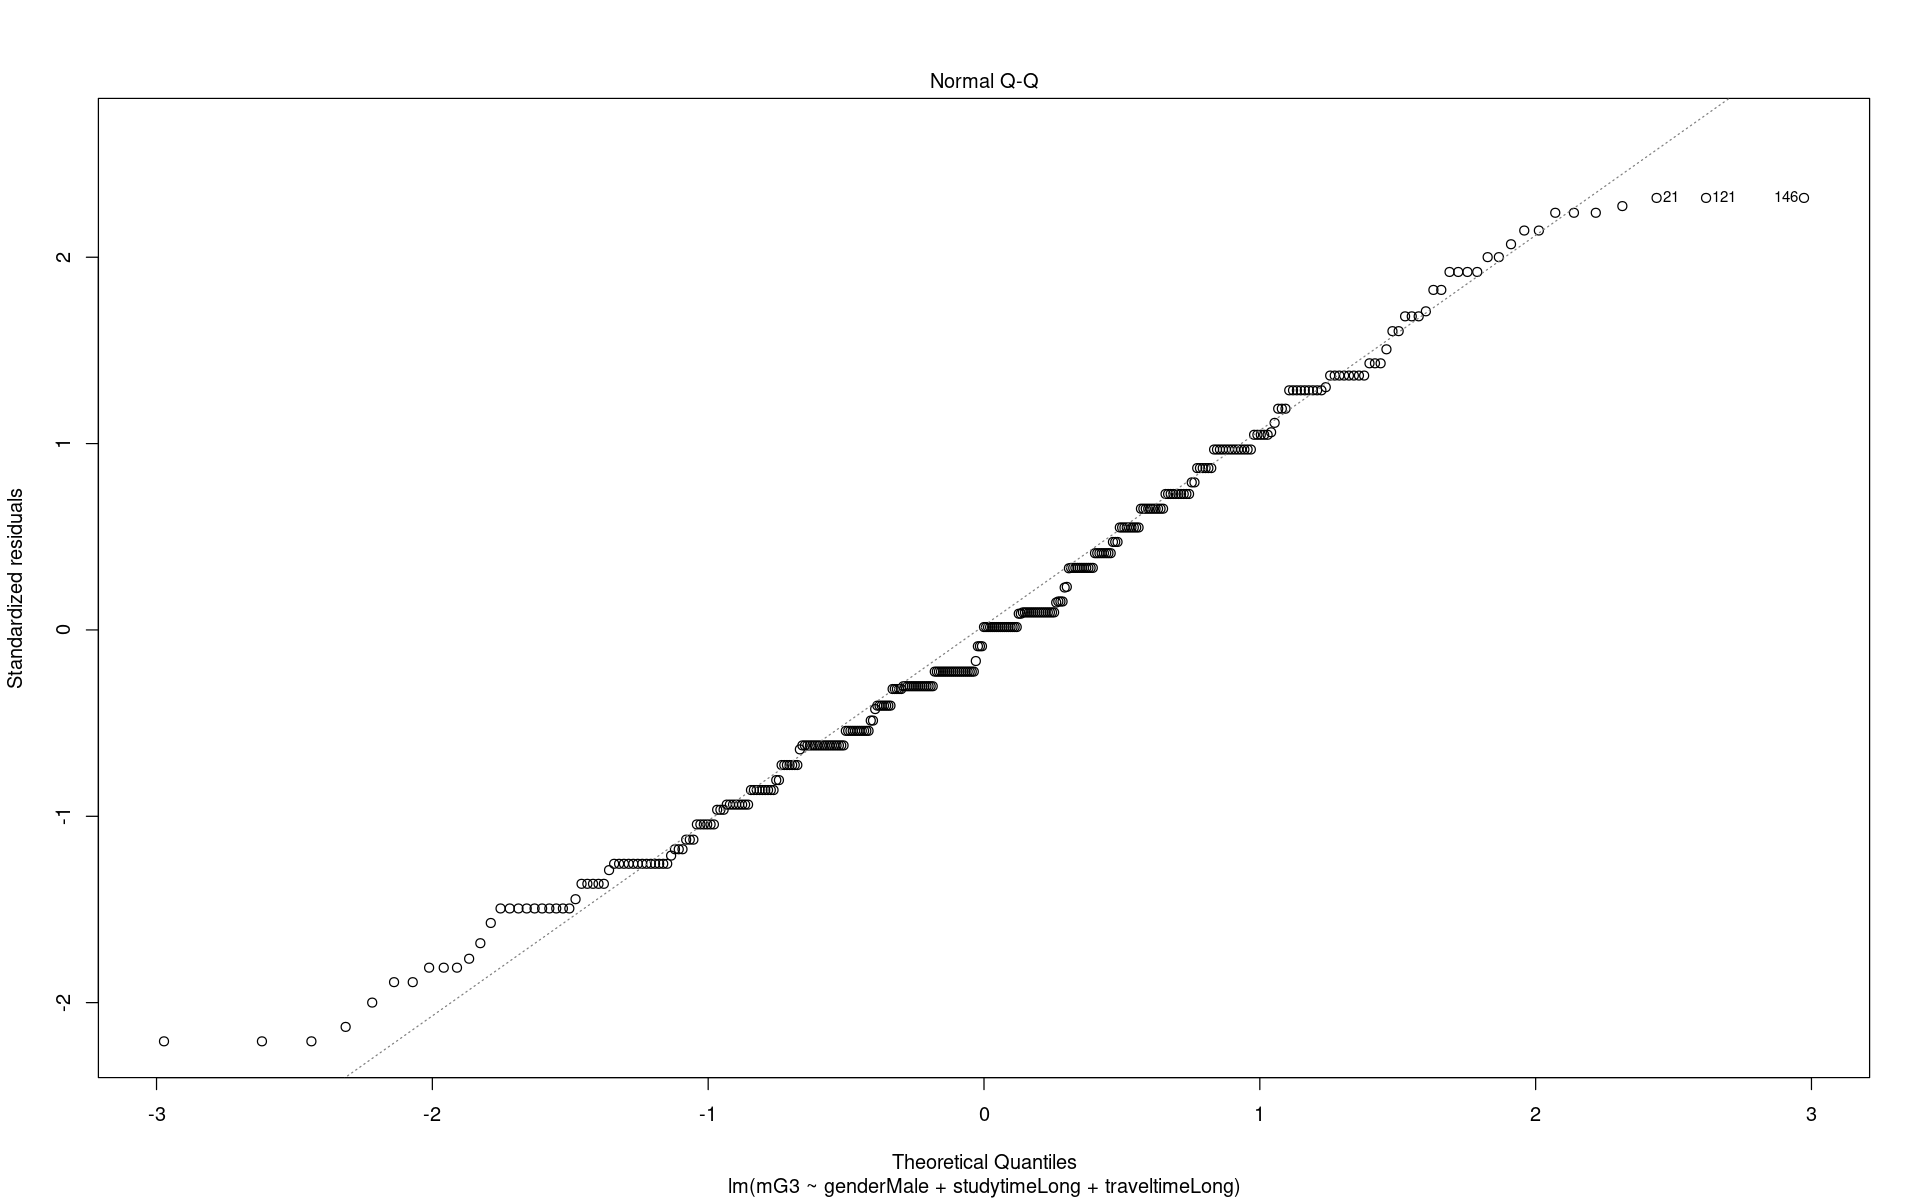

In [75]:
plot(final_model, 2)

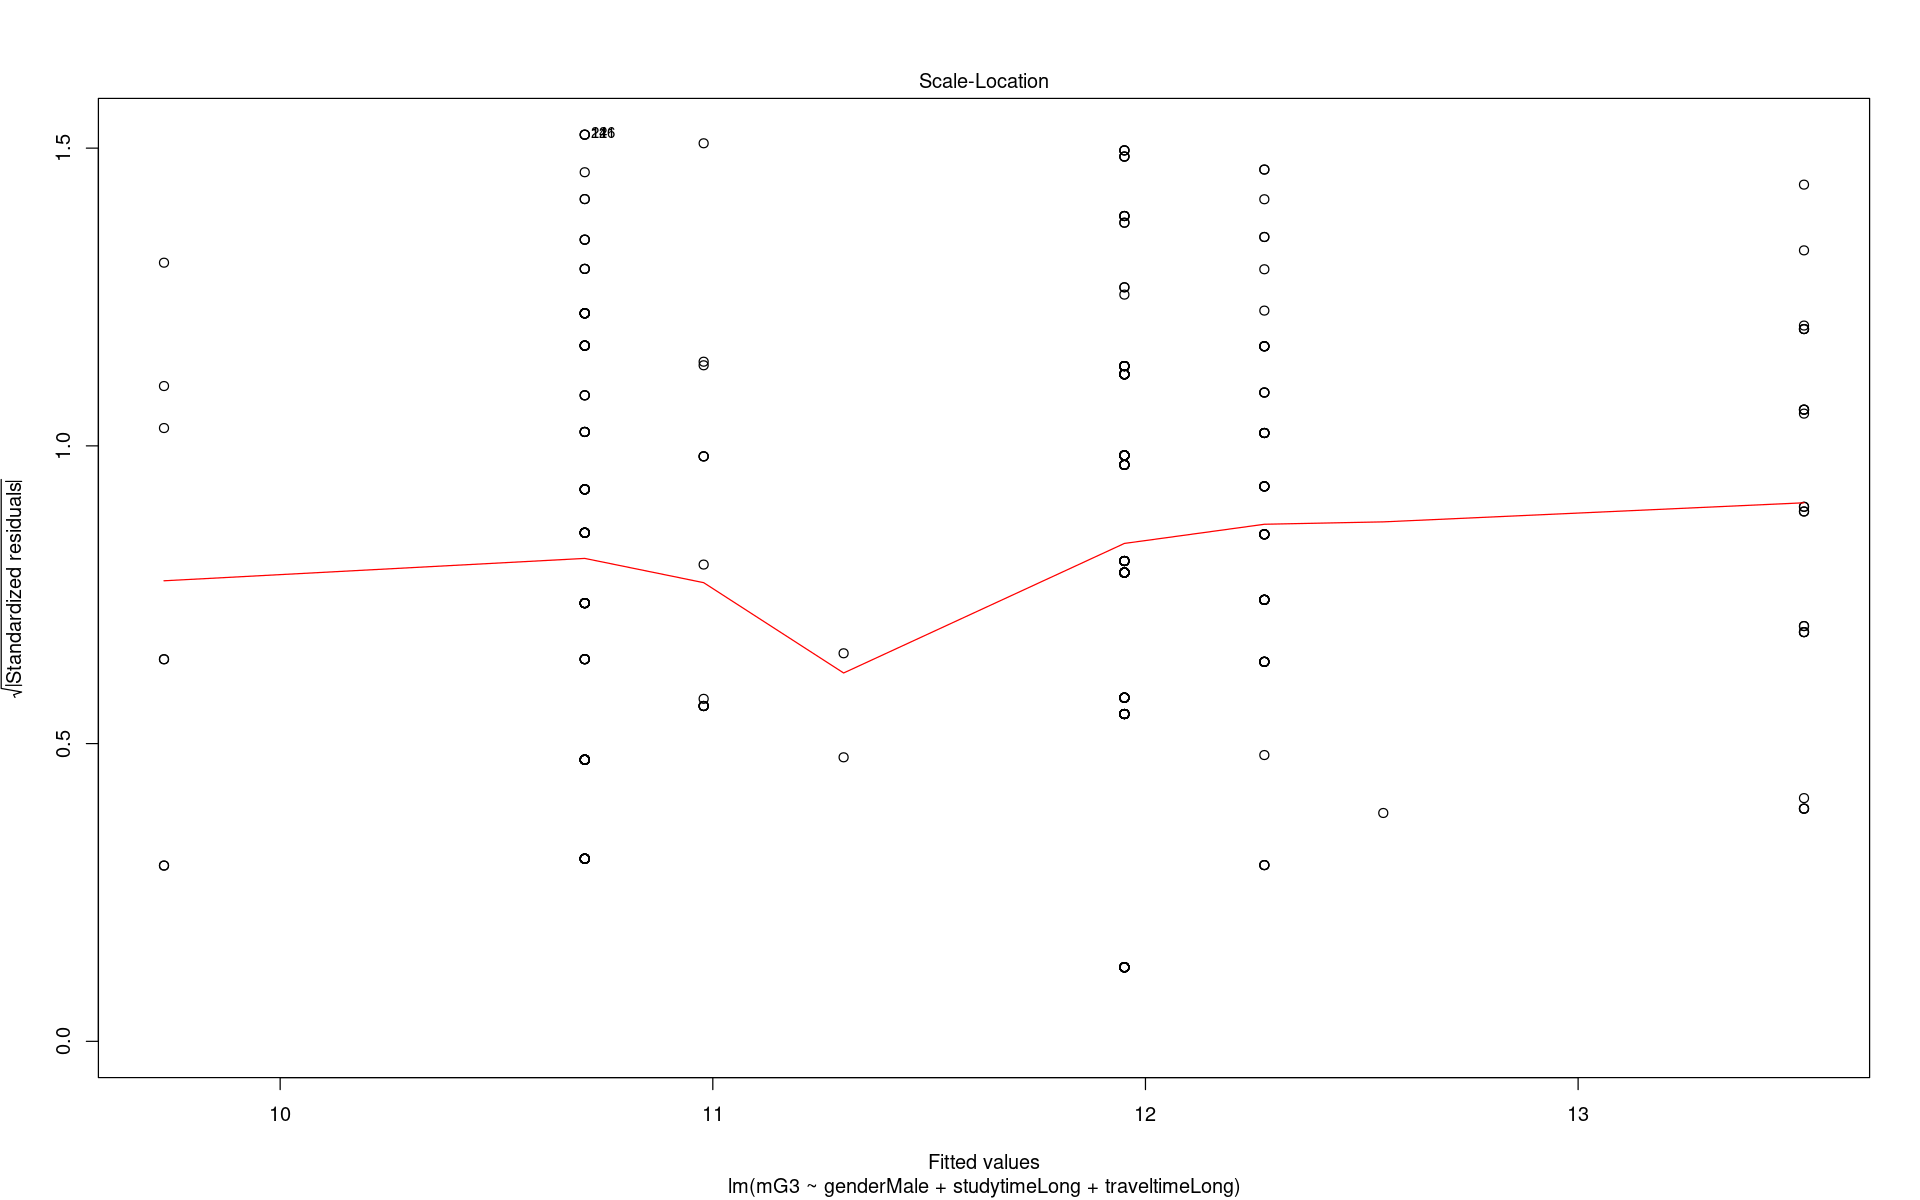

In [76]:
plot(final_model, 3)

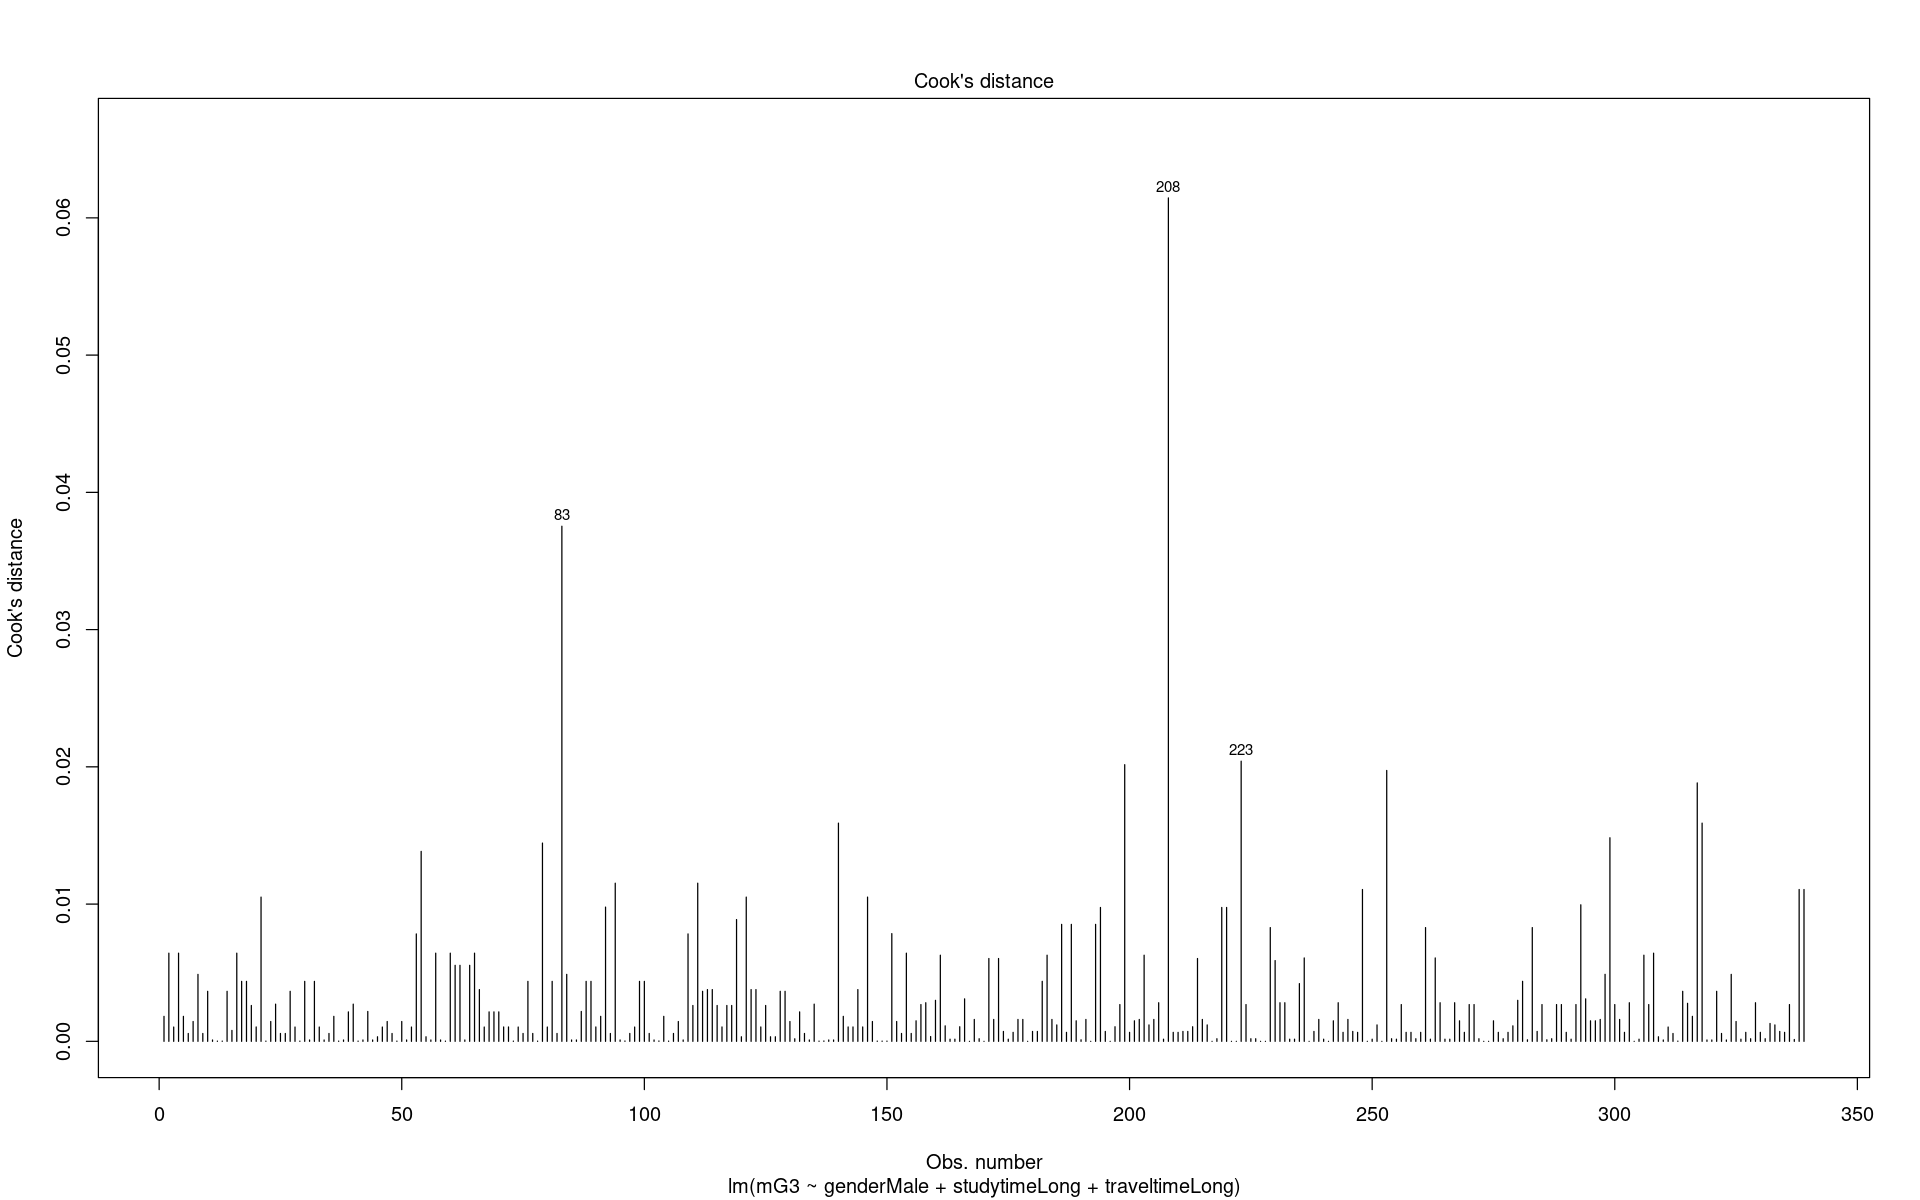

In [77]:
plot(final_model, 4)

In [88]:
# Logistic regression model base on studytime correlating to pass or fail.
logistic_data <- norm_score_data

In [89]:
# first create dummy variable for pass and fail
logistic_data$passed = ifelse(logistic_data$mG3 >=10,1,0)

In [115]:
logistic_data$studytimeLong = ifelse(logistic_data$studytime.m >=3,1,0)

In [118]:
logistic_data$traveltimeLong = ifelse(logistic_data$traveltime.m >=3,1,0)

In [155]:
#Make sure categorical data is used as factors
logmodel1 <- glm(passed ~ studytimeLong + traveltimeLong + sex, data = logistic_data, na.action = na.exclude, family = binomial(link=logit))

In [156]:
#Full summary of the model
summary(logmodel1)


Call:
glm(formula = passed ~ studytimeLong + traveltimeLong + sex, 
    family = binomial(link = logit), data = logistic_data, na.action = na.exclude)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0227  -0.4623   0.6984   0.7204   0.9267  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.69312    0.19168   3.616 0.000299 ***
studytimeLong   0.62055    0.32789   1.893 0.058416 .  
traveltimeLong -0.07017    0.49892  -0.141 0.888155    
sexM            0.59356    0.26183   2.267 0.023395 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 381.81  on 338  degrees of freedom
Residual deviance: 374.24  on 335  degrees of freedom
AIC: 382.24

Number of Fisher Scoring iterations: 4


In [130]:
#Chi-square plus significance
lmtest::lrtest(logmodel1)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,-187.1210,NA,NA,NA
2,1,-190.9058,-3,7.569623,0.05579626


In [123]:
#Chi-square and Pseudo R2 calculation 
modelChi <- logmodel1$null.deviance - logmodel1$deviance
modelChi

[1] 7.569623

In [124]:
pseudo.R2 <- modelChi / logmodel1$null.deviance
pseudo.R2

[1] 0.01982555

In [125]:
chidf <- logmodel1$df.null - logmodel1$df.residual
chidf

[1] 3

In [126]:
chisq.prob <- 1 - pchisq(modelChi, chidf)
chisq.prob


[1] 0.05579626

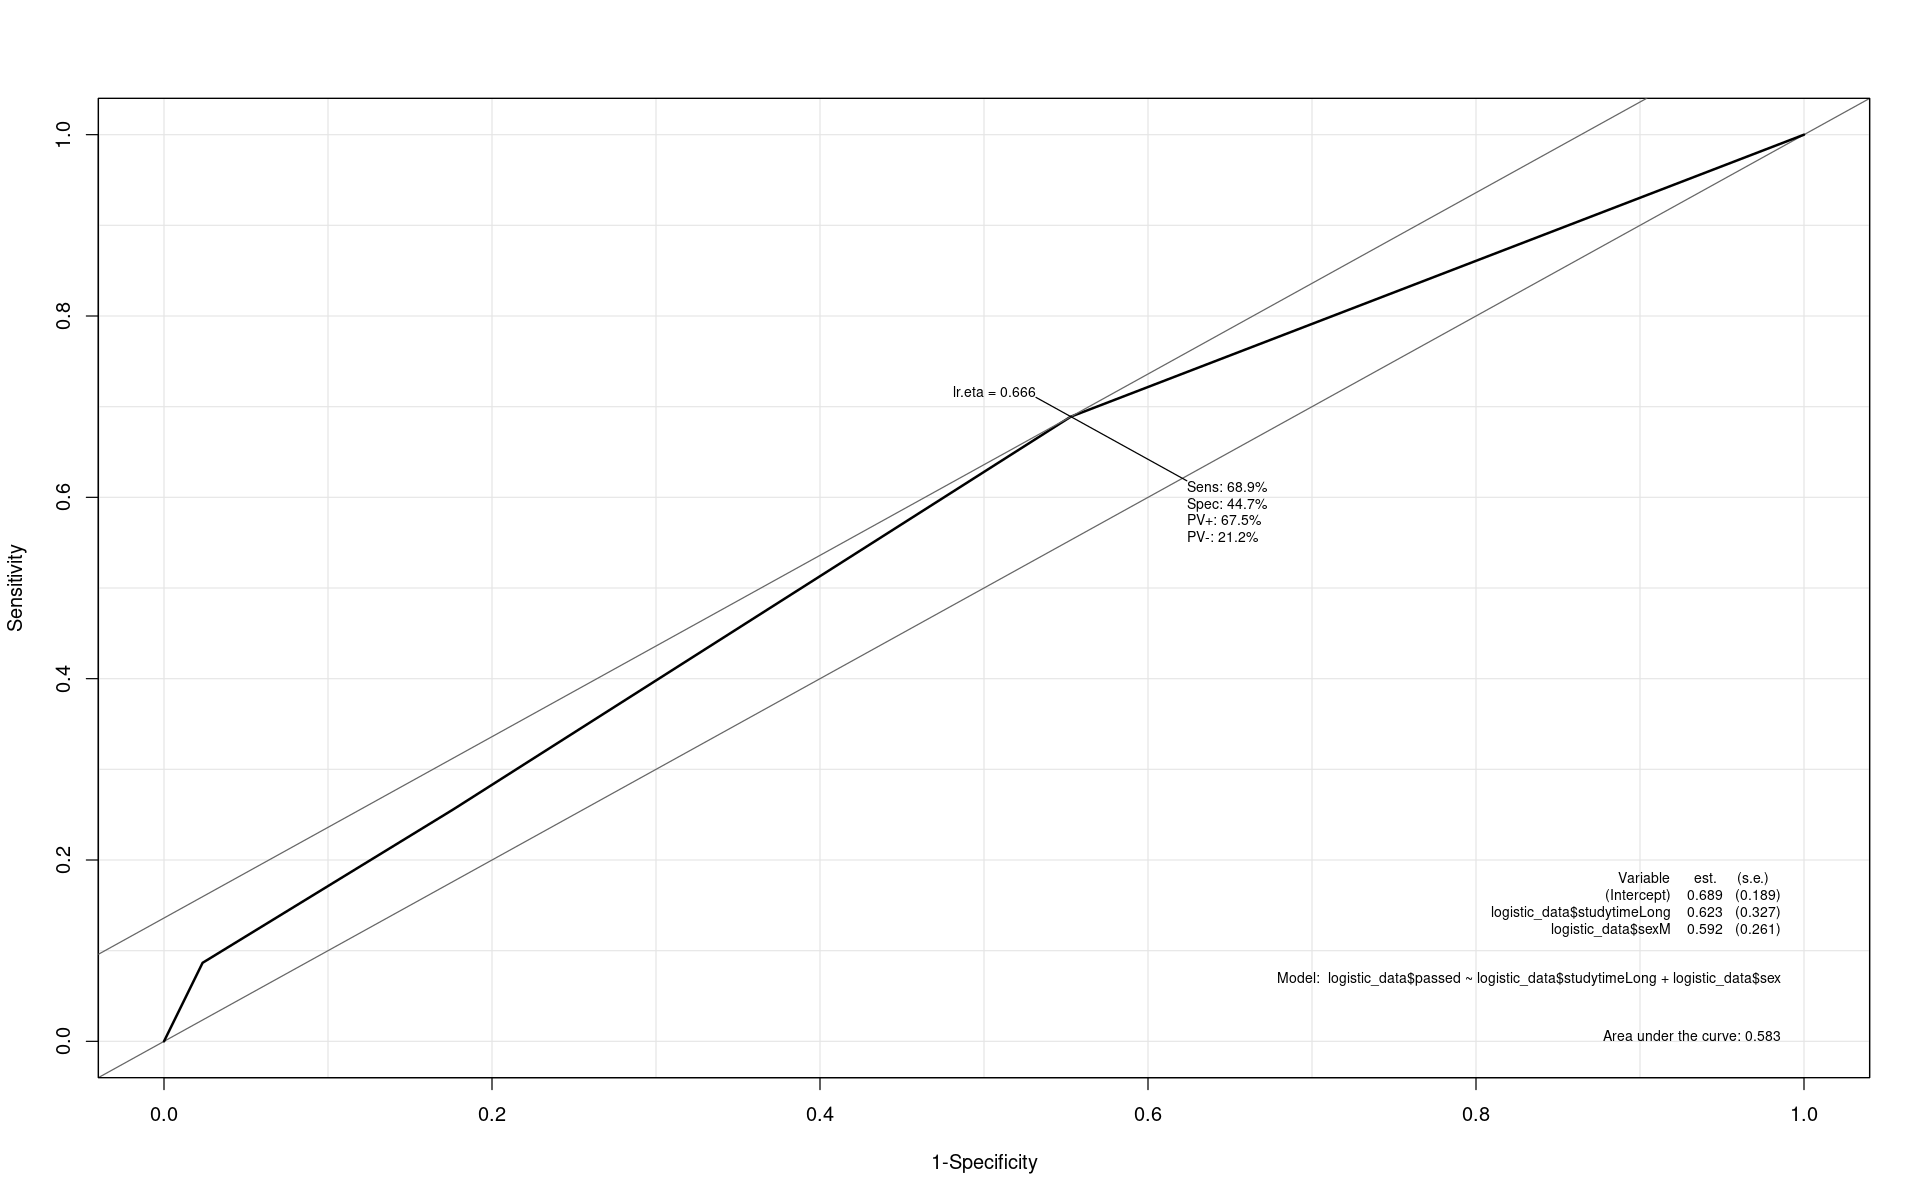

In [152]:
#Output the sensitivity, specificity, and ROC plot
Epi::ROC(form=logistic_data$passed ~ logistic_data$studytimeLong + logistic_data$sex, plot="ROC")

In [128]:
#Pseudo Rsquared 
DescTools::PseudoR2(logmodel1, which="CoxSnell")
DescTools::PseudoR2(logmodel1, which="Nagelkerke")

CoxSnell 
0.02208182

Nagelkerke 
0.03267676

In [129]:
#Summary of the model with co-efficients
stargazer(logmodel1, type="text")


                      Dependent variable:    
                  ---------------------------
                            passed           
---------------------------------------------
studytimeLong               0.621*           
                            (0.328)          
                                             
traveltimeLong              -0.070           
                            (0.499)          
                                             
sexM                        0.594**          
                            (0.262)          
                                             
Constant                   0.693***          
                            (0.192)          
                                             
---------------------------------------------
Observations                  339            
Log Likelihood             -187.121          
Akaike Inf. Crit.           382.242          
Note:             *p<0.1; **p<0.05; ***p<0.01


In [131]:
#confusion matrix
regclass::confusion_matrix(logmodel1)

Predicted levels same as naive model (majority level)


         Predicted 1
Actual 0          85
Actual 1         254

In [132]:
#Collinearity
vifmodel<-car::vif(logmodel1)#You can ignore the warning messages, GVIF^(1/(2*Df)) is the value of interest
vifmodel
#Tolerance
1/vifmodel

studytimeLong traveltimeLong            sex 
      1.046299       1.006884       1.047352

studytimeLong traveltimeLong            sex 
     0.9557498      0.9931635      0.9547891

In [134]:
#Check the assumption of linearity of independent variables and log odds using a Hosmer-Lemeshow test, if this is not statistically significant we are ok
generalhoslem::logitgof(logistic_data$passed, fitted(logmodel1))

Warning message in generalhoslem::logitgof(logistic_data$passed, fitted(logmodel1)):
“Not possible to compute 10 rows. There might be too few observations.”



	Hosmer and Lemeshow test (binary model)

data:  logistic_data$passed, fitted(logmodel1)
X-squared = 0.7908, df = 2, p-value = 0.6734


In [160]:
# building logisitic regression on mG1, mG2, mG3
#Make sure categorical data is used as factors
logmodel2 <- glm(passed ~ mG1 + mG2 , data = logistic_data, na.action = na.exclude, family = binomial(link=logit))

In [161]:
summary(logmodel2)


Call:
glm(formula = passed ~ mG1 + mG2, family = binomial(link = logit), 
    data = logistic_data, na.action = na.exclude)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.65100  -0.01949   0.01760   0.22776   1.97857  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -15.83075    2.30127  -6.879 6.02e-12 ***
mG1           0.07773    0.15619   0.498    0.619    
mG2           1.68519    0.26659   6.321 2.60e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 381.81  on 338  degrees of freedom
Residual deviance: 135.26  on 336  degrees of freedom
AIC: 141.26

Number of Fisher Scoring iterations: 8


In [162]:
#Chi-square plus significance
lmtest::lrtest(logmodel2)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,-67.62904,NA,NA,NA
2,1,-190.90578,-2,246.5535,2.894645e-54


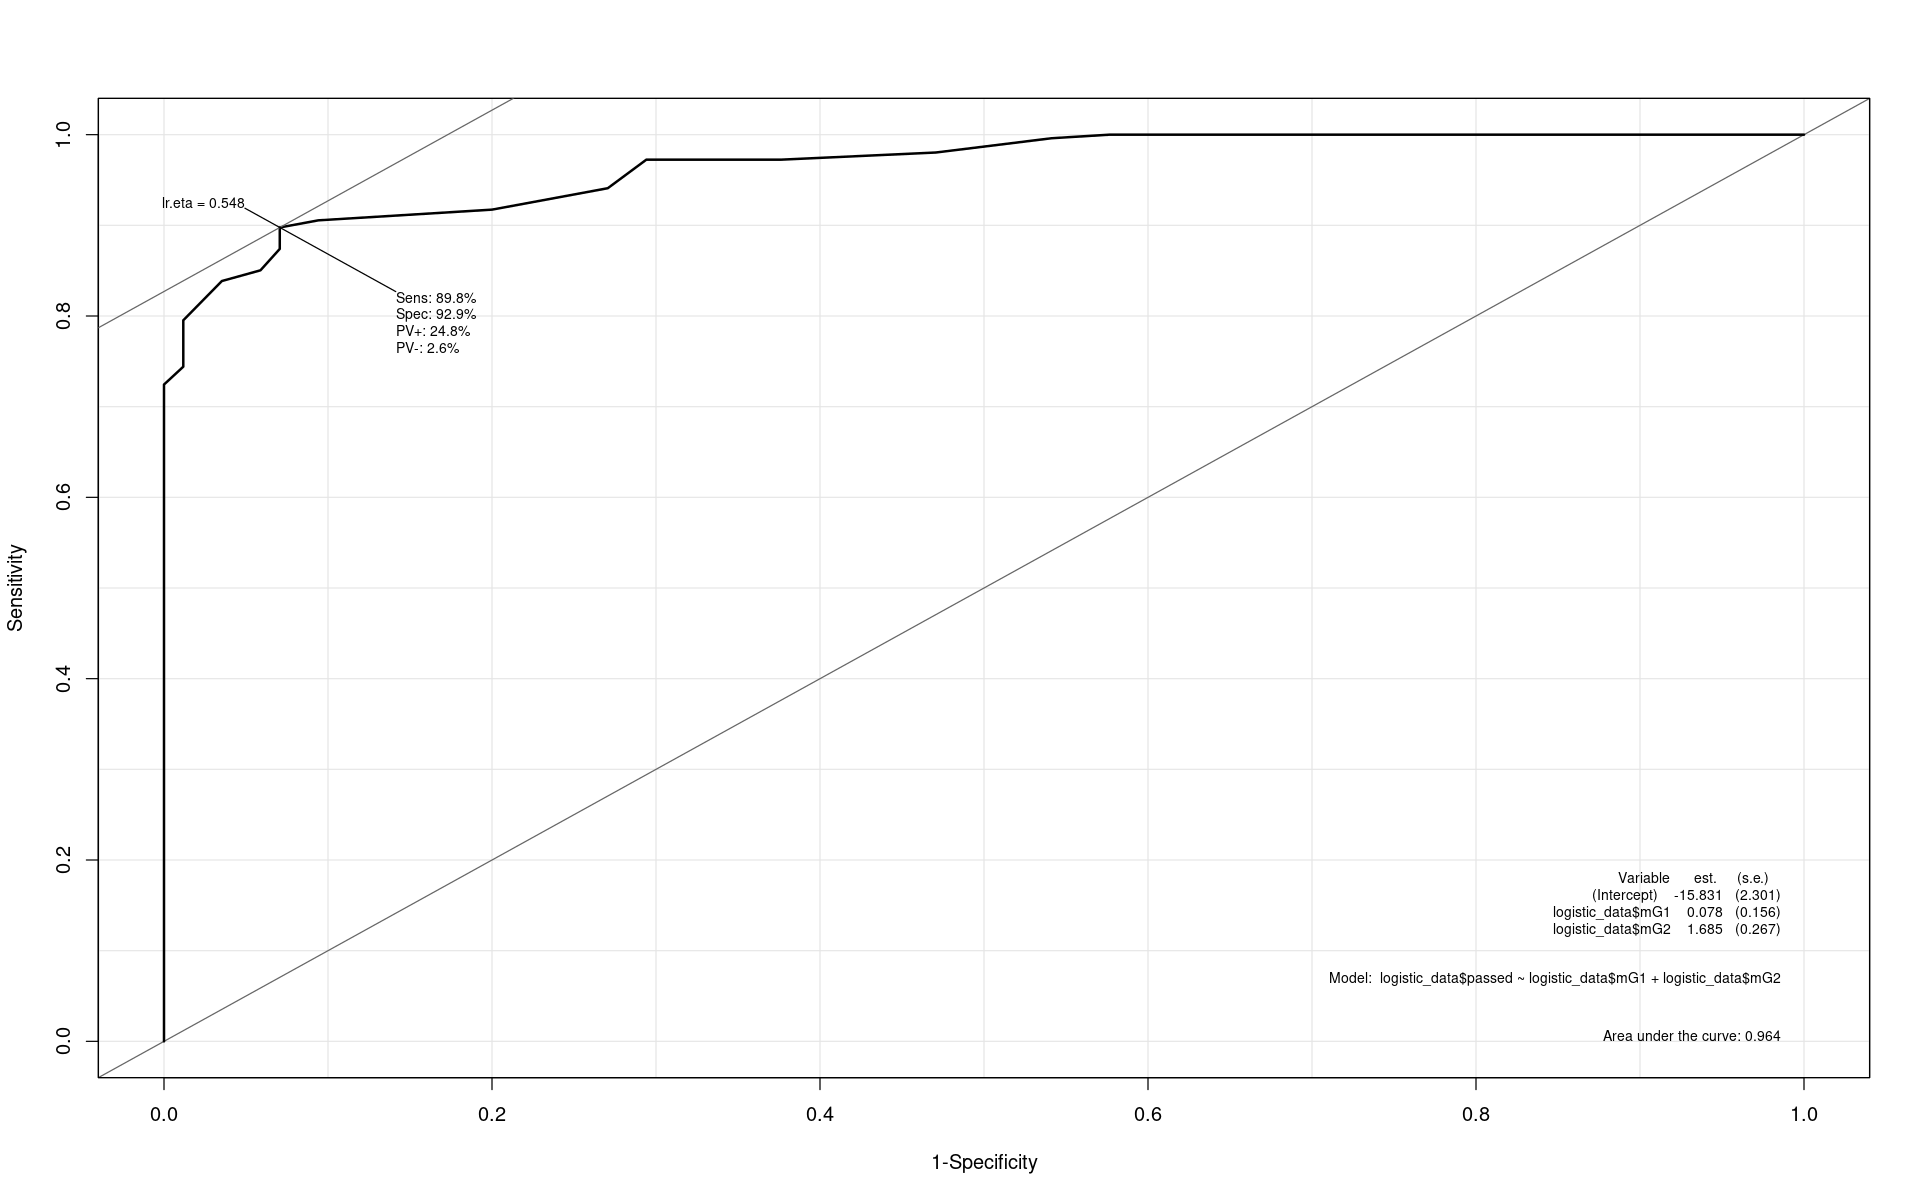

In [163]:
#Output the sensitivity, specificity, and ROC plot
Epi::ROC(form=logistic_data$passed ~ logistic_data$mG1 + logistic_data$mG2, plot="ROC")

In [164]:
#Pseudo Rsquared 
DescTools::PseudoR2(logmodel2, which="CoxSnell")
DescTools::PseudoR2(logmodel2, which="Nagelkerke")

CoxSnell 
0.5167863

Nagelkerke 
 0.7647423

In [165]:
#Summary of the model with co-efficients
stargazer(logmodel2, type="text")


                      Dependent variable:    
                  ---------------------------
                            passed           
---------------------------------------------
mG1                          0.078           
                            (0.156)          
                                             
mG2                        1.685***          
                            (0.267)          
                                             
Constant                  -15.831***         
                            (2.301)          
                                             
---------------------------------------------
Observations                  339            
Log Likelihood              -67.629          
Akaike Inf. Crit.           141.258          
Note:             *p<0.1; **p<0.05; ***p<0.01


In [166]:
#confusion matrix
regclass::confusion_matrix(logmodel2)

,Predicted 0,Predicted 1,Total
Actual 0,62,23,85
Actual 1,15,239,254
Total,77,262,339


In [167]:
#Collinearity
vifmodel<-car::vif(logmodel2)#You can ignore the warning messages, GVIF^(1/(2*Df)) is the value of interest
vifmodel
#Tolerance
1/vifmodel

mG1      mG2 
1.176129 1.176129

mG1       mG2 
0.8502469 0.8502469

In [168]:
#Check the assumption of linearity of independent variables and log odds using a Hosmer-Lemeshow test, if this is not statistically significant we are ok
generalhoslem::logitgof(logistic_data$passed, fitted(logmodel2))

Warning message in generalhoslem::logitgof(logistic_data$passed, fitted(logmodel2)):
“At least one cell in the expected frequencies table is < 1. Chi-square approximation may be incorrect.”



	Hosmer and Lemeshow test (binary model)

data:  logistic_data$passed, fitted(logmodel2)
X-squared = 4.6459, df = 8, p-value = 0.7947
